# UML501 Project 
# Name: Radhika Rani (102203775)

In [ ]:
#loading data
import os
#loading data saved in my computer
ROOT = r"C:\Users\goyal\Downloads\archive"
IMGS_PATH = os.path.join(ROOT, 'images', 'images')
TRIMAP_PATH = os.path.join(ROOT, 'annotations', 'annotations', 'trimaps')
#these images were not loading for some reason , so i removed them from list of all_imgs 
bad_imgs = {'Abyssinian_34.jpg', 'Egyptian_Mau_145.jpg', 'Egyptian_Mau_139.jpg', 
            'Egyptian_Mau_191.jpg', 'Egyptian_Mau_177.jpg', 'Egyptian_Mau_167.jpg'}
all_trimaps = [i for i in os.listdir(TRIMAP_PATH) if i.rsplit('.',1)[1] == 'png']
try:
    # Listing all .jpg images except the bad ones
    all_imgs = [img for img in os.listdir(IMGS_PATH) if img.endswith('.jpg') and img not in bad_imgs]
    print(f"We have {len(all_imgs)} good images.")
    print(f"({len(bad_imgs)} images cannot be loaded)")
except FileNotFoundError:
    print(f"The path {IMGS_PATH} does not exist. Please check the path.")

# Data Analysis

In [2]:
#data analysis
annotations_path = open(ROOT+ '/annotations/annotations/list.txt', 'r')

# Lambda functions to get breed and species from annotations in the dataset
get_breed = lambda pic: pic.rsplit('_', 1)[0].lower()
get_species = lambda num: 'cat' if num == 1 else 'dog'

# Dictionaries to store data
info_by_id = {}
info_by_breed = {}

for line in annotations_path:
        # Skipping lines starting with '#'
        if line.startswith('#'):
            continue

        # Splitting line on spaces
        line = line.strip().split(' ')

        # Getting required info
        species = get_species(int(line[2]))
        global_id = int(line[1])
        breed_id = int(line[3])
        name = get_breed(line[0]).lower()

        # Adding entry to dictionaries
        if name not in info_by_breed:
            info_by_breed[name] = {'breed': name, 'species': species, 'globalid': global_id, 'breedid': breed_id, 'count': 0}
        info_by_id[global_id] = info_by_breed[name]

# Counting images per breed
for img in [get_breed(n) for n in all_imgs]:
  info_by_breed[img]['count']+=1
# Printinf results
print("Breed Information:")
for breed, data in info_by_breed.items():
    print(f"Breed: {breed}, Species: {data['species']}, Count: {data['count']}")


Breed Information:
Breed: abyssinian, Species: cat, Count: 199
Breed: american_bulldog, Species: dog, Count: 200
Breed: american_pit_bull_terrier, Species: dog, Count: 200
Breed: basset_hound, Species: dog, Count: 200
Breed: beagle, Species: dog, Count: 200
Breed: bengal, Species: cat, Count: 200
Breed: birman, Species: cat, Count: 200
Breed: bombay, Species: cat, Count: 200
Breed: boxer, Species: dog, Count: 200
Breed: british_shorthair, Species: cat, Count: 200
Breed: chihuahua, Species: dog, Count: 200
Breed: egyptian_mau, Species: cat, Count: 195
Breed: english_cocker_spaniel, Species: dog, Count: 200
Breed: english_setter, Species: dog, Count: 200
Breed: german_shorthaired, Species: dog, Count: 200
Breed: great_pyrenees, Species: dog, Count: 200
Breed: havanese, Species: dog, Count: 200
Breed: japanese_chin, Species: dog, Count: 200
Breed: keeshond, Species: dog, Count: 200
Breed: leonberger, Species: dog, Count: 200
Breed: maine_coon, Species: cat, Count: 200
Breed: miniature_pin

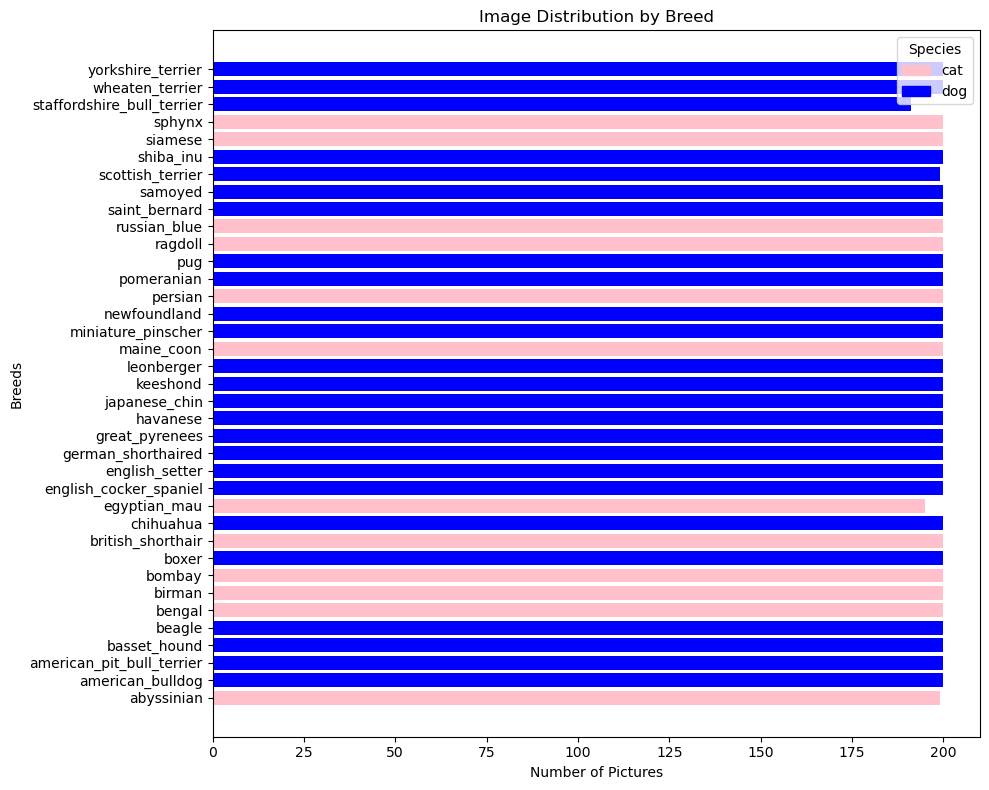

In [3]:
#data analysis
import matplotlib.pyplot as plt

# Extracting breed and no. of images per breed
ids = list(info_by_id.keys())
counts = [info_by_id[id]['count'] for id in ids]
x_labels = [info_by_id[id]['breed'] for id in ids]

# Setting different colors for dog and cat
colours = ['pink' if info_by_id[id]['species'] == 'cat' else 'blue' for id in ids]
colours_leg = {'cat': 'pink', 'dog': 'blue'}
labels = list(colours_leg.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colours_leg[label]) for label in colours_leg]

# Adding ticks,  legend, labels, and title
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(ids, counts, color=colours)
ax.set_yticks(ids)
ax.set_yticklabels(x_labels, rotation=0)
plt.legend(handles, labels, title="Species")
plt.ylabel('Breeds')
plt.xlabel('Number of Pictures')
plt.title('Image Distribution by Breed')

# Plotting
plt.tight_layout()
plt.show()


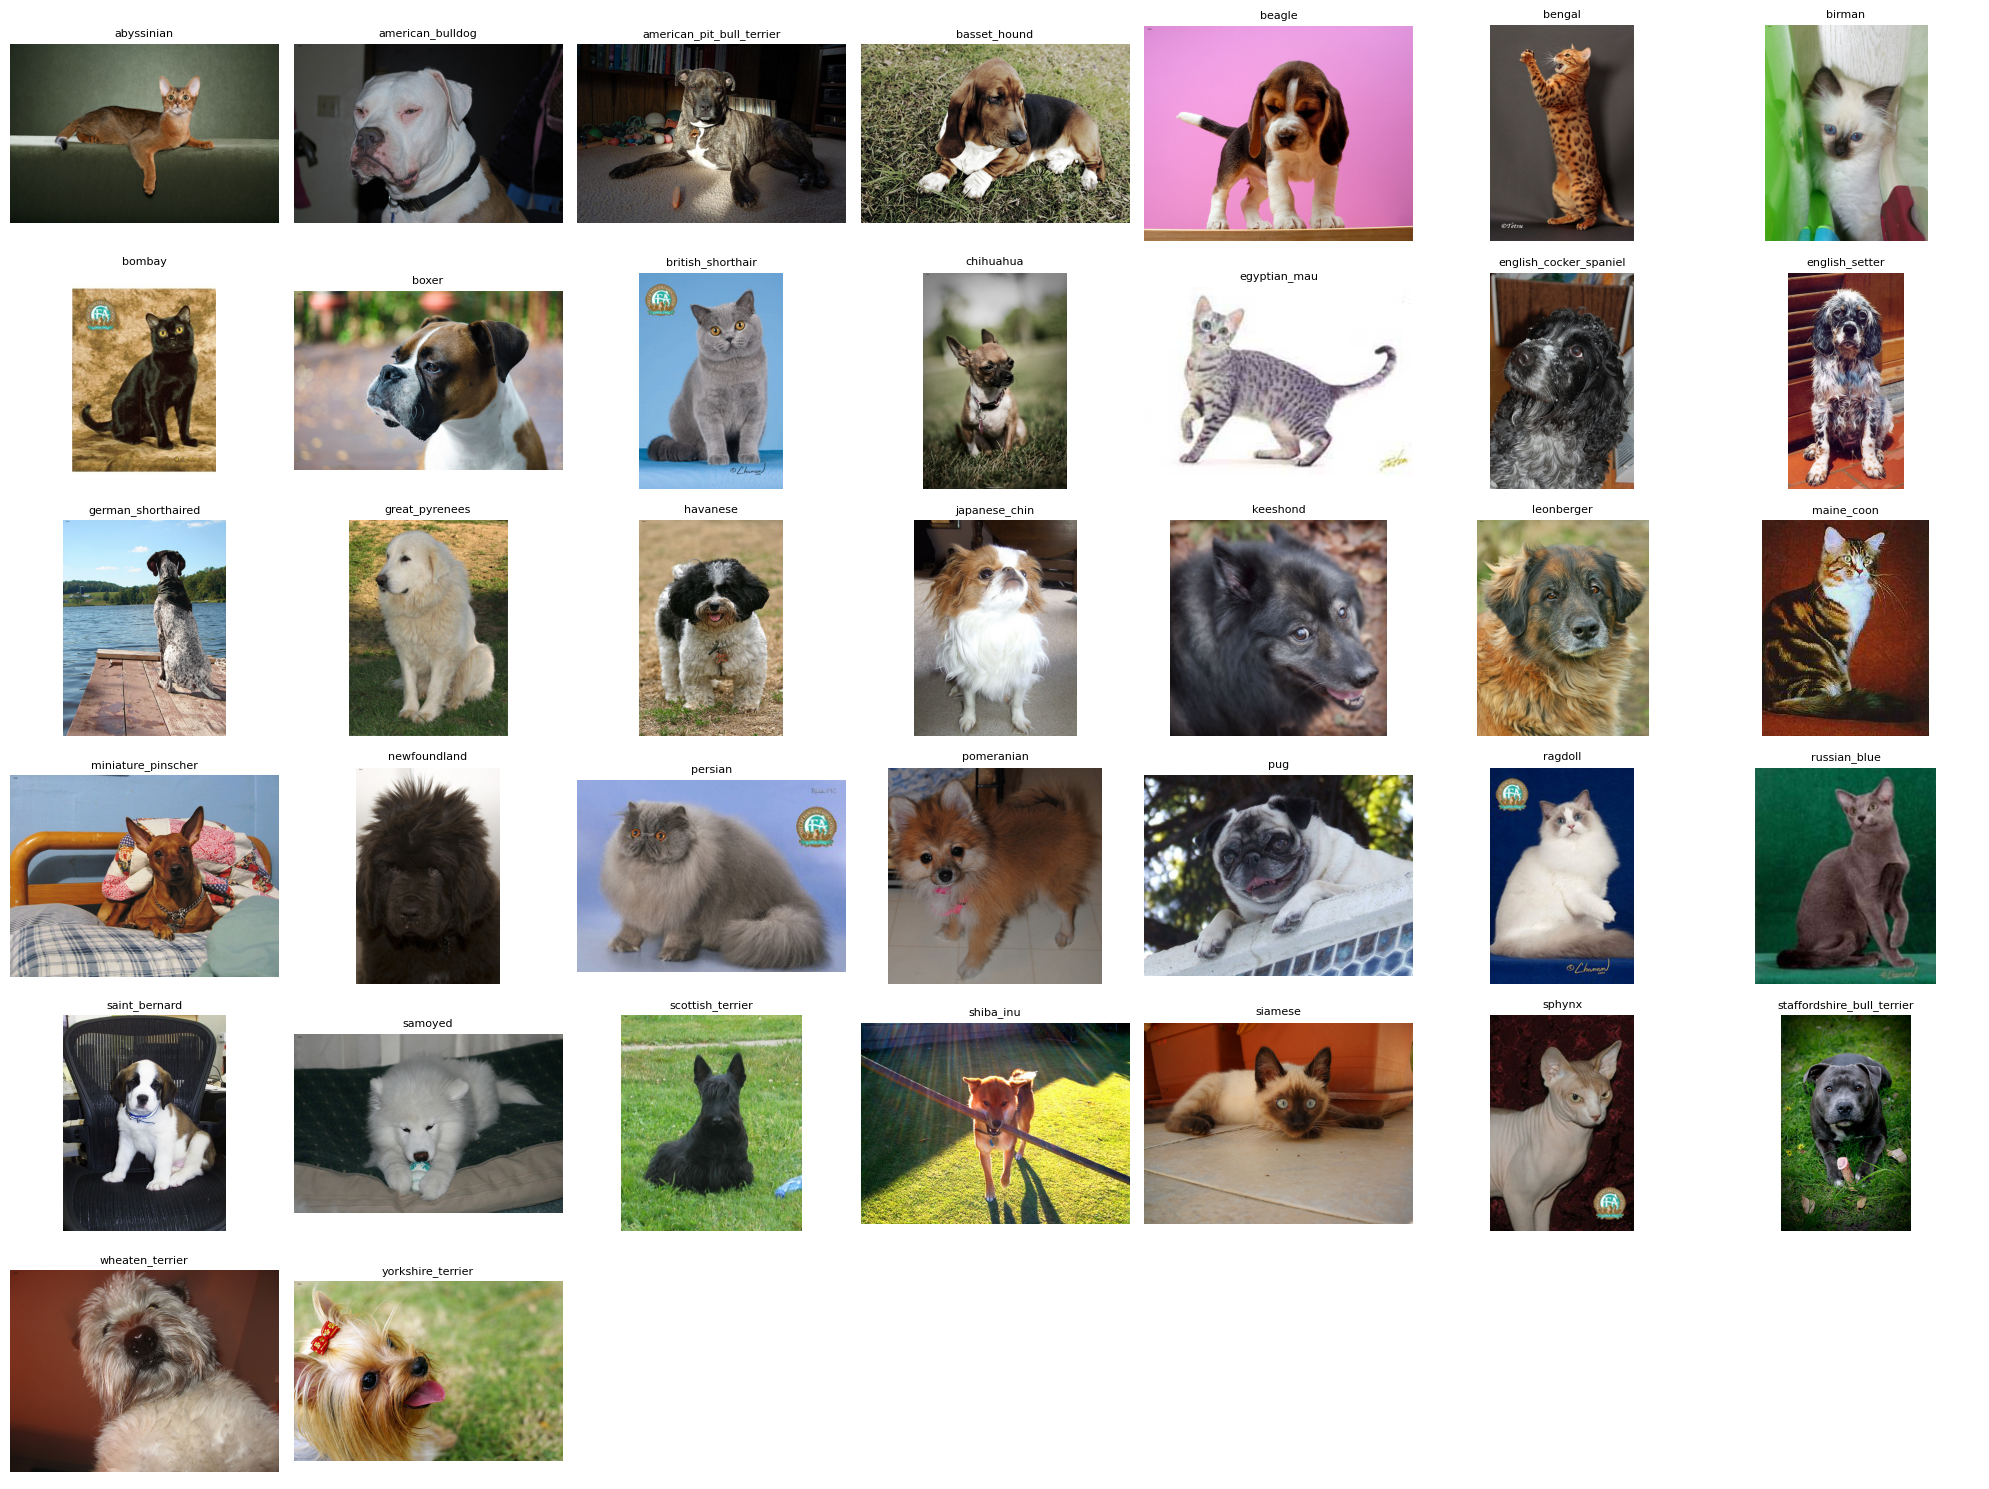

In [4]:
#data analysis
#code to generate 1 image from each breed for the report
import os
import matplotlib.pyplot as plt
from PIL import Image

image_by_breed = {}

# Mapping each breed to first image
for img in all_imgs:
    breed_name = get_breed(img)
    if breed_name in info_by_breed and breed_name not in image_by_breed:
        image_by_breed[breed_name] = os.path.join(IMGS_PATH, img)

fig, axes = plt.subplots(6, 7, figsize=(20, 15))  # Adjust grid size based on the number of breeds
axes = axes.flatten()

# Looping through breeds to display
for idx, (breed, image_path) in enumerate(image_by_breed.items()):
    try:
        img = Image.open(image_path)
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(breed, fontsize=8)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

for ax in axes[len(image_by_breed):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Data Pre-processing

In [5]:
#data preprocessing

import cv2
import random
import numpy as np
#we are going to use this pixel size 
IMG_SIZE = 299
def getxy(rem_background=False, imgs=None):

    #this returns the number corresponding to the breed in image name
  get_class_no = lambda name: info_by_breed[get_breed(name)]['globalid']

# initialising training data
  training_data = []

 # Iterating through each image in all_imgs
  for img in all_imgs:
    path = os.path.join(IMGS_PATH, img)

 # Loading img in RGB format
    img_array = cv2.imread(path)[...,::-1]
      
#removing background for better performance 
    if rem_background:
        trimap_filename = img.rsplit('.', 1)[0] + '.png'
        if trimap_filename in all_trimaps:
            tri_array = cv2.imread(os.path.join(TRIMAP_PATH, trimap_filename))
            tri_array[tri_array==2] = 0
            tri_array[tri_array>0] = 1
            img_array = np.multiply(tri_array, img_array)

 #resizing img
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    class_no = get_class_no(img)
    if imgs is not None and class_no not in imgs:
        imgs[class_no] = path
        
    training_data.append([img_array, class_no])
      
#shuffling data to improve performance
  random.shuffle(training_data)

# Appending images and classes to training data list
  training = list(zip(*training_data))
  x = training[0]
  y = training[1]
    
#transforming to array and resizing 
  x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
  y = np.array(y)
  return x, y


In [6]:
#getting data with no background
x,y= getxy(rem_background=True)
#splitting that data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)


In [7]:
#encoding y to 0's and 1's

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

def onehotencode_func(y):
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded


In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold


# Used only 3 folds because its computationally faster
kfold = StratifiedKFold(n_splits=3, shuffle=True)

def test_params(lr, model_func):
  dic = {}
  i = 0.0
#impelmenting k cross fold validation
  folds = kfold.split(x_train, y_train)
  for train_index, val_index in folds:

    # getting the model with the desired parameters 
    model = model_func(lr)

    x_train_kf, x_val_kf =  x_train[train_index], x_train[val_index]
    y_train_kf, y_val_kf = onehotencode_func(y_train[train_index]), onehotencode_func(y_train[val_index])

    # training the model with data from the train data folds
    historytemp = model.fit(x_train_kf, y_train_kf, batch_size=32, epochs=8, validation_data=(x_val_kf, y_val_kf))

    del model

    if dic == {}:
      # if dictionary is empty, values will be put there
      dic['train_acc'] = np.array(historytemp.history['accuracy'])
      dic['train_loss'] = np.array(historytemp.history['loss'])
      dic['val_acc'] = np.array(historytemp.history['val_accuracy'])
      dic['val_loss'] = np.array(historytemp.history['val_loss'])
    else:
      # if dictionary is not empty, values will be added element wise
      dic['train_acc'] += np.array(historytemp.history['accuracy'])
      dic['train_loss'] += np.array(historytemp.history['loss'])
      dic['val_acc'] += np.array(historytemp.history['val_accuracy'])
      dic['val_loss'] += np.array(historytemp.history['val_loss'])
    
    i+=1

  for k in dic:
    # each number in each array in the dictionary will be divided by the number of iterations, producing the mean of all the values read
    dic[k] /= i

  return dic



# Simple Neural Network Model

In [9]:
#SIMPLE MODEL

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#Function that returns simple sequential model

def mySimpleModel(dropout=0.35, learning_rate=0.001):
    model = Sequential()
    model.add(Flatten(input_shape=(299, 299, 3)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout)) 
    model.add(BatchNormalization()) 
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(37, activation='softmax'))
    
    # Compiling model
    model.compile(optimizer=Adam(learning_rate=learning_rate),loss='categorical_crossentropy',  
                  metrics=['accuracy'])
    
    # Summary
    model.summary()
    
    return model


## Hyper parameter tuning in simple model

In [ ]:
#i)varying learning rate
#ii)varying dropout rate

lr={}
dr={}
learning_rate_list = [0.01, 0.001]
dropout_values_list = [0.25, 0.35]
# changing learning rate:
lr_model_func = lambda x : mySimpleModel(learning_rate=x)
for lr_val in learning_rate_list:
  lr[lr_val] = test_params(lr_val, lr_model_func)
    
# chaning dropout value:
drop_model_func = lambda x : mySimpleModel(dropout=x)
for d_val in dropout_values_list:
 dr[d_val] = test_params(d_val, drop_model_func)

**plotting for learning rate = 0.01 and 0.001 in simple model**

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,7))

i = 0
#looping through all values of lr
for val in lr:
    # looping through every metric of that value
    for metric in lr[val]:
        # plotting
        axs[i].plot(lr[val][metric], label=metric2name[metric])

    axs[i].set_title('learning rate = ' + str(val))
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('value')
    axs[i].legend(loc='upper right')
    i +=1

fig.suptitle('Evolution of Metrics Varying Learning Rate', size='xx-large')
fig.tight_layout()
plt.show()

**plotting for dropout rate =0.25 and 0.35 in simple model**

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,7))

i = 0
#looping through all values of dr
for val in dr:
    # looping through every metric of that value
    for metric in dr[val]:
        # plotting
        axs[i].plot(dr[val][metric], label=metric2name[metric])

    axs[i].set_title('dropout rate = ' + str(val))
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('value')
    axs[i].legend(loc='upper right')
    i +=1

fig.suptitle('Evolution of Metrics Varying Dropout Rate', size='xx-large')
fig.tight_layout()
plt.show()

## Model Evaluation for Simple Model

In [ ]:
model = mySimpleModel(learning_rate=0.001, dropout=0.35)
model.fit(x_train, onehotencode_func(y_train), batch_size=50, epochs=5)
y_pred = model.predict(x_test)
y_pred_id = [ np.argmax(i)+1 for i in y_pred]

#OBtaining confusion matrix and classification report for simple model
import matplotlib.pyplot as plt
from sklearn import metrics

# Computing matrix
cm = metrics.confusion_matrix(y_test, y_pred_id)

labels = sorted(set(y_test))

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cm, cmap='Blues')

# Setting ticks and labels using class number 
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation='vertical', fontsize=8)
ax.set_yticklabels(labels, fontsize=8)

plt.xlabel('Predicted Breed')
plt.ylabel('True Breed')
plt.title('Confusion Matrix of Dog Breed Classification', size='xx-large')

#plotting
plt.show()

# Displaying sumamry of classification report as table
report = metrics.classification_report(y_test, y_pred_id, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
summary_df = report_df.loc[['precision', 'recall', 'f1-score'], ['macro avg', 'weighted avg']]
summary_df.columns = ['Macro Average', 'Weighted Average']
summary_df.index = ['Precision', 'Recall', 'F1-score']

print("Classification Report Summary:")
print(summary_df)


# Complex Neural Network Model

In [ ]:
#COMPLEX MODEL

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input, UpSampling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam

def myComplexModel(dropout=0.25, learning_rate=0.001, augmentation=False):
    # Loading pre-trained InceptionV3 model without the top layer, freezing its layers
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=(299, 299, 3))
    x=inputs
    x = tf.keras.applications.inception_v3.preprocess_input(x)
    x = base_model(x, training=False) 

    x =  tf.keras.layers.GlobalAveragePooling2D()(x)
    x =  tf.keras.layers.Dense(256,activation='relu')(x)
    x =  tf.keras.layers.Dropout(dropout)(x)
    x =  tf.keras.layers.BatchNormalization()(x)

    outputs = tf.keras.layers.Dense(37, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    model.summary()
    # Compiling 
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


## Hyper parameter tuning in complex model

In [ ]:
#hyper parameter tuning in complex model
#i)varying learning rate
#ii)varying dropout rate

lr={}
dr={}
learning_rate_list = [0.01, 0.001]
dropout_values_list = [0.25, 0.35]
# changing learning rate:
lr_model_func = lambda x : myComplexModel(learning_rate=x)
for lr_val in learning_rate_list:
  lr[lr_val] = test_params(lr_val, lr_model_func)
    
# chaning dropout value:
drop_model_func = lambda x : myComplexModel(dropout=x)
for d_val in dropout_values_list:
 dr[d_val] = test_params(d_val, drop_model_func)

**plotting for learning rate = 0.01 and 0.001 in complex model**

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,7))

i = 0
#looping through all values of lr
for val in lr:
    # looping through every metric of that value
    for metric in lr[val]:
        # plotting
        axs[i].plot(lr[val][metric], label=metric2name[metric])

    axs[i].set_title('learning rate = ' + str(val))
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('value')
    axs[i].legend(loc='upper right')
    i +=1

fig.suptitle('Evolution of Metrics Varying Learning Rate', size='xx-large')
fig.tight_layout()
plt.show()

**plotting for dropout rate =0.25 and 0.35 in simple model**

In [ ]:
#plotting for dropout rate =0.25 and 0.35 in complex model

fig, axs = plt.subplots(2, figsize=(10,7))

i = 0
#looping through all values of dr
for val in dr:
    # looping through every metric of that value
    for metric in dr[val]:
        # plotting
        axs[i].plot(dr[val][metric], label=metric2name[metric])

    axs[i].set_title('dropout rate = ' + str(val))
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('value')
    axs[i].legend(loc='upper right')
    i +=1

fig.suptitle('Evolution of Metrics Varying Dropout Rate', size='xx-large')
fig.tight_layout()
plt.show()

## Model EValuation for Complex Model

In [ ]:
model = myComplexModel(learning_rate=0.001, dropout=0.35)
model.fit(x_train, onehotencode_func(y_train), batch_size=50, epochs=5)
y_pred = model.predict(x_test)
y_pred_id = [ np.argmax(i)+1 for i in y_pred]

#OBtaining confusion matrix and classification report for simple model
import matplotlib.pyplot as plt
from sklearn import metrics

# Computing matrix
cm = metrics.confusion_matrix(y_test, y_pred_id)

labels = sorted(set(y_test))

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cm, cmap='Blues')

# Setting ticks and labels using class number 
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation='vertical', fontsize=8)
ax.set_yticklabels(labels, fontsize=8)

plt.xlabel('Predicted Breed')
plt.ylabel('True Breed')
plt.title('Confusion Matrix of Dog Breed Classification', size='xx-large')

#plotting
plt.show()

# Displaying sumamry of classification report as table
report = metrics.classification_report(y_test, y_pred_id, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
summary_df = report_df.loc[['precision', 'recall', 'f1-score'], ['macro avg', 'weighted avg']]
summary_df.columns = ['Macro Average', 'Weighted Average']
summary_df.index = ['Precision', 'Recall', 'F1-score']

print("Classification Report Summary:")
print(summary_df)
